### Inserção dos Dados


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

tic_domicilios_2024_df = pd.read_csv(
    'dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv',
    sep=';'
)
tic_domicilios_2024_df

,QUEST,ID_DOMICILIO,ID_MORADOR,SEXO,IDADE,FAIXA_ETARIA,GRAU_INSTRUCAO_1,ESTUD,APOSENT,PEA,...,G1_AGREG,C8_NAO,I1A_NENHUM,J5_FAIXAS,J2_NENHUM,J3_AGREG,J3AB,C5_COB_AGREG,C5_COB_NENHUM,C6_COB_NENHUM
0,200809622,1,3,2,83,6,1,0,1,5,...,0,1,1,1,99,1,2,0,1,1
1,200809621,2,1,1,63,6,1,0,1,1,...,0,1,1,0,1,0,4,0,1,1
2,200820881,4,1,1,70,6,10,0,1,1,...,1,1,1,1,99,1,2,0,1,1
3,200818341,6,1,1,85,6,1,0,0,5,...,0,1,1,0,1,0,4,0,1,1
4,200818340,7,1,2,54,5,15,0,0,1,...,0,1,1,1,99,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21165,204517715,35530,5,2,23,2,12,0,0,5,...,1,99,99,0,99,1,2,0,1,1
21166,204517818,35531,1,1,64,6,10,0,0,5,...,1,99,99,1,99,1,3,0,1,1
21167,204500379,35532,4,2,34,3,15,0,0,5,...,1,1,1,1,99,1,2,0,1,1
21168,204545048,35533,2,2,26,3,15,0,0,2,...,1,99,99,2,99,1,1,0,1,1


### "Pente Fino" nas colunas

In [5]:
# 1. Definir a lista de colunas relevantes para o estudo da exclusão digital
colunas_relevantes = [
    # --- Identificadores e Peso ---
    'QUEST', 'ID_DOMICILIO', 'PESO',

    # --- Variáveis Socioeconômicas (Features) --- 
    'FAIXA_ETARIA', 
    'GRAU_INSTRUCAO_1', 
    'RENDA_FAMILIAR', 
    'CLASSE_2015', 
    'AREA', # Urbana ou Rural
    'COD_REGIAO_2', # Região do Brasil

    # --- Variáveis de Acesso e Uso (Alvo da Análise) ---
    'C1',   # Já usou a Internet? (Nossa variável principal)
    'C3',   # Quando usou pela última vez?
    'C4',   # Frequência de uso nos últimos 3 meses
    
    # Dispositivos usados
    'C5_A', # Computador de mesa
    'C5_B', # Notebook
    'C5_C', # Tablet
    'C5_D', # Celular
    'C5_F', # Televisão

    # --- Variáveis de Barreira (Motivos para não usar) ---
    'C2_D', # Não tem onde acessar
    'C2_E', # É muito caro
    'C2_I', # Falta de interesse/necessidade
    'C2_J'  # Não sabe usar
]

# 2. Carregar o arquivo CSV original, mas usando apenas as colunas que definimos
try:
    # A opção 'usecols' é muito eficiente, pois lê apenas o que precisamos da memória.
    tic_domicilios_2024_df = pd.read_csv(
        'dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv', 
        sep=';',
        usecols=colunas_relevantes
    )

    # 3. Exibir as informações do nosso novo DataFrame
    print("DataFrame 'tic_domicilios_2024_df' criado com sucesso!")
    print("\nInformações do DataFrame:")
    tic_domicilios_2024_df.info()

    print("\nVisualizando as 5 primeiras linhas:")
    print(tic_domicilios_2024_df.head())

except Exception as e:
    print(f"Ocorreu um erro: {e}")
    print("\nVerifique se o nome da coluna na lista 'colunas_relevantes' está digitado corretamente.")

DataFrame 'tic_domicilios_2024_df' criado com sucesso!

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   QUEST             21170 non-null  int64 
 1   ID_DOMICILIO      21170 non-null  int64 
 2   FAIXA_ETARIA      21170 non-null  int64 
 3   GRAU_INSTRUCAO_1  21170 non-null  int64 
 4   C1                21170 non-null  int64 
 5   C2_D              21170 non-null  int64 
 6   C2_E              21170 non-null  int64 
 7   C2_I              21170 non-null  int64 
 8   C2_J              21170 non-null  int64 
 9   C3                21170 non-null  int64 
 10  C4                21170 non-null  int64 
 11  C5_A              21170 non-null  int64 
 12  C5_B              21170 non-null  int64 
 13  C5_C              21170 non-null  int64 
 14  C5_D              21170 non-null  int64 
 15  C5_F              2117

### Análise Exploratória de Dados

Primeiro vamos analisar a porcetagem de pessoas que nunca usaram a internet

--- Panorama Nacional da Exclusão Digital (2024) ---
Número total de não-usuários de internet na amostra: 4072
Porcentagem total de não-usuários de internet na amostra: 19.26%
-------------------------------------------------------

--- Detalhamento por Região ---
Porcentagem de pessoas que NUNCA usaram a internet, por região do Brasil (2024):
      Região Usa_Internet  Porcentagem
     Sudeste          Não    22.620302
    Nordeste          Não    20.186378
Centro-Oeste          Não    19.627054
       Norte          Não    17.747989
         Sul          Não    15.236819


C:\Users\ \AppData\Local\Temp\ \4231952815.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(



Gráfico salvo como 'exclusao_digital_por_regiao.png'.


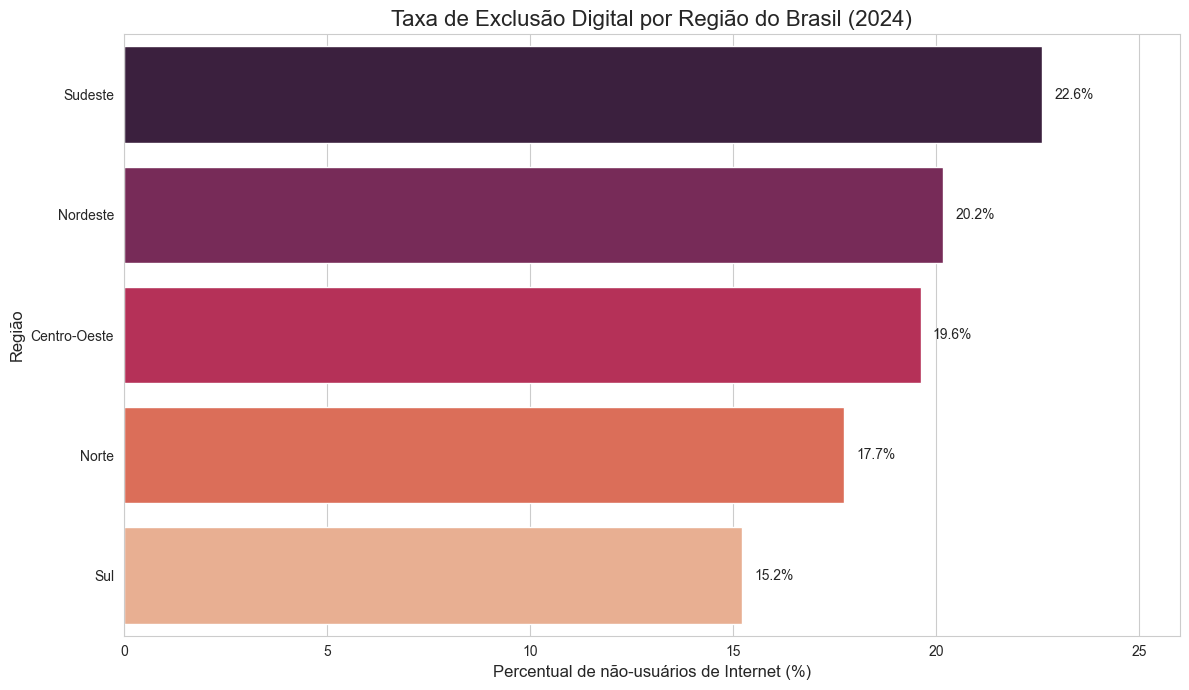

In [6]:
# --- 1. Cálculo Geral ---
# Filtrar apenas respostas válidas para a pergunta C1 (Sim ou Não)
respostas_validas_c1 = tic_domicilios_2024_df[tic_domicilios_2024_df['C1'].isin([0, 1])]

# Contar o número total de não-usuários
total_nao_usuarios = (respostas_validas_c1['C1'] == 0).sum()

# Contar o total de respondentes com respostas válidas
total_geral_respondentes = len(respostas_validas_c1)

# Calcular a porcentagem geral de não-usuários
porcentagem_geral_nao_usuarios = (total_nao_usuarios / total_geral_respondentes) * 100

print("--- Panorama Nacional da Exclusão Digital (2024) ---")
print(f"Número total de não-usuários de internet na amostra: {total_nao_usuarios}")
print(f"Porcentagem total de não-usuários de internet na amostra: {porcentagem_geral_nao_usuarios:.2f}%")
print("-" * 55)


# --- 2. Cálculo Regional ---
df_analise = tic_domicilios_2024_df.copy()

regiao_map = {
    1: 'Sudeste',
    2: 'Nordeste',
    3: 'Sul',
    4: 'Norte',
    5: 'Centro-Oeste'
}
c1_map = {
    0: 'Não',
    1: 'Sim'
}

df_analise['Região'] = df_analise['COD_REGIAO_2'].map(regiao_map)
df_analise['Usa_Internet'] = df_analise['C1'].map(c1_map)

proporcao_por_regiao = df_analise.groupby('Região')['Usa_Internet'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()
nao_usuarios_por_regiao = proporcao_por_regiao[proporcao_por_regiao['Usa_Internet'] == 'Não']
nao_usuarios_por_regiao = nao_usuarios_por_regiao.sort_values('Porcentagem', ascending=False)

print("\n--- Detalhamento por Região ---")
print("Porcentagem de pessoas que NUNCA usaram a internet, por região do Brasil (2024):")
print(nao_usuarios_por_regiao.to_string(index=False))


# --- 3. Geração do Gráfico (sem alterações) ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='Porcentagem', 
    y='Região', 
    data=nao_usuarios_por_regiao, 
    palette='rocket'
)
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 0.3, 
        p.get_y() + p.get_height() / 2, 
        f'{width:.1f}%', 
        va='center'
    )

plt.title('Taxa de Exclusão Digital por Região do Brasil (2024)', fontsize=16)
plt.xlabel('Percentual de não-usuários de Internet (%)', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.xlim(0, nao_usuarios_por_regiao['Porcentagem'].max() * 1.15)
plt.tight_layout()
plt.savefig('C:/Users/ /github-classroom/analisededados-ufpb/ad-projeto-exclusao-digital/Imagens/exclusao_digital_por_regiao.png')

print("\nGráfico salvo como 'exclusao_digital_por_regiao.png'.")

Percebemos, portanto, que há dois fatores importantes a serem observados:

Proporcionalmente, mesmo o Sudeste sendo mais desenvolvido que o Nordeste ele conta com uma maior porcentagem de pessoas sem qualquer uso e acesso à internet, e o mesmo vale para o Centro-Oeste e Norte, respectivamente.

Segundo: Em todas as regiõs, a quantidade de pessoas que nunca utilizaram chega perto dos 19 ou 20%, sendo esta a porcentagem total de pessoas que nunca utilizaram na amostragem. Entretanto, a diferença do Sul para o Sudeste conta com 7 pontos de diferença, então, apesar da proximidade percentual geral, e considerando que estamos tratando de milhares de pessoas, não há uma homogeneidade na exclusão digital quando pensamos na porcentagem além da amostra.

Considerando os dados contraintuitivos da porcentagem das regiões, iremos analisar a diferença de área urbana E rural agora, para descobrirmos se há uma possibilidade das áreas urbanas do sudeste estarem puxando a porcentagem

--- Taxa de Exclusão Digital por Região e Área (Urbana/Rural) ---
      Região   Área Usa_Internet  Porcentagem
Centro-Oeste  Rural          Não    22.260274
Centro-Oeste Urbana          Não    19.359331
    Nordeste  Rural          Não    26.949153
    Nordeste Urbana          Não    18.881805
       Norte  Rural          Não    27.788280
       Norte Urbana          Não    16.699566
     Sudeste  Rural          Não    34.400000
     Sudeste Urbana          Não    20.110780
         Sul  Rural          Não    22.619048
         Sul Urbana          Não    13.932702

Gráfico detalhado salvo como 'exclusao_digital_por_regiao_e_area.png'.


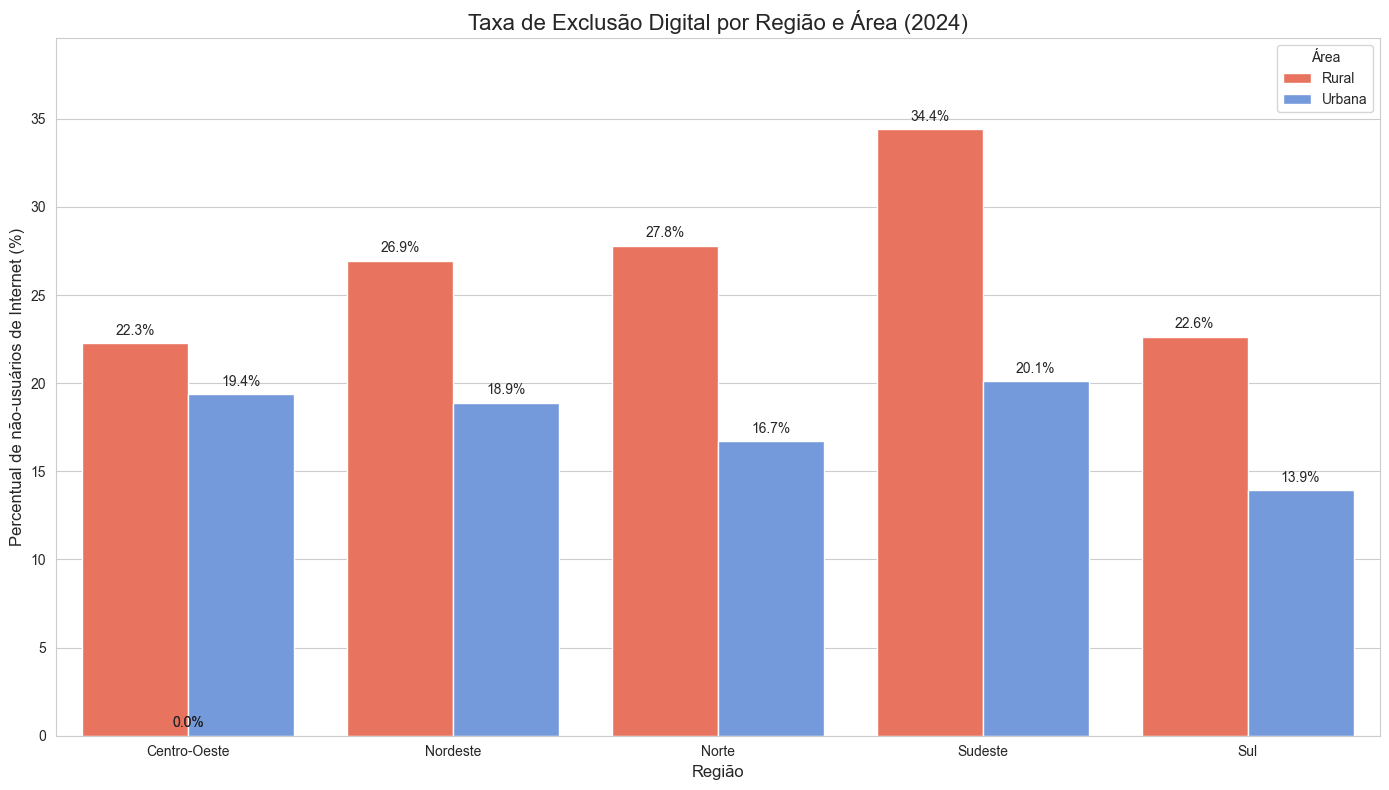

In [7]:
# 1. Mapear todas as variáveis categóricas para seus rótulos
df_analise_detalhada = tic_domicilios_2024_df.copy()

regiao_map = {1: 'Sudeste', 2: 'Nordeste', 3: 'Sul', 4: 'Norte', 5: 'Centro-Oeste'}
area_map = {1: 'Urbana', 2: 'Rural'}
c1_map = {0: 'Não', 1: 'Sim'}

df_analise_detalhada['Região'] = df_analise_detalhada['COD_REGIAO_2'].map(regiao_map)
df_analise_detalhada['Área'] = df_analise_detalhada['AREA'].map(area_map)
df_analise_detalhada['Usa_Internet'] = df_analise_detalhada['C1'].map(c1_map)

# 2. Agrupar por Região E Área, e calcular a proporção de não-usuários
proporcao_detalhada = df_analise_detalhada.groupby(['Região', 'Área'])['Usa_Internet'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# 3. Filtrar para manter apenas a informação dos não-usuários ('Não')
nao_usuarios_detalhado = proporcao_detalhada[proporcao_detalhada['Usa_Internet'] == 'Não']

print("--- Taxa de Exclusão Digital por Região e Área (Urbana/Rural) ---")
print(nao_usuarios_detalhado.to_string(index=False))

# 4. Gerar o gráfico de barras agrupado para comparar
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='Região', 
    y='Porcentagem', 
    hue='Área', 
    data=nao_usuarios_detalhado,
    palette={'Urbana': 'cornflowerblue', 'Rural': 'tomato'}
)

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Taxa de Exclusão Digital por Região e Área (2024)', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Percentual de não-usuários de Internet (%)', fontsize=12)
plt.legend(title='Área')
plt.ylim(0, nao_usuarios_detalhado['Porcentagem'].max() * 1.15) # Ajuste de altura para os rótulos
plt.tight_layout()

# Salvar a imagem
plt.savefig('Imagens/exclusao_digital_por_regiao_e_area.png')

print("\nGráfico detalhado salvo como 'exclusao_digital_por_regiao_e_area.png'.")

Com a diferença das regiões agora demonstradas, vamos explorar a faixa etária e os motivos.


--- Distribuição de Idade entre Pessoas que NUNCA Usaram a Internet ---
   Faixa Etária  Porcentagem
   10 a 15 anos     1.669941
   16 a 24 anos     1.669941
   25 a 34 anos     2.996071
   35 a 44 anos     4.715128
   45 a 59 anos    19.548134
60 anos ou mais    69.400786


C:\Users\ \AppData\Local\Temp\ \2274421239.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Faixa Etária', y='Porcentagem', data=distribuicao_idade, palette='viridis')



Gráfico do perfil etário salvo como 'faixa_etaria_nao_usuarios.png'.

--- Percentual de Não-Usuários que Apontam Cada Motivo (em relação ao TOTAL de não-usuários da faixa etária) ---
                 Não sabe usar  Falta de interesse/necessidade  \
Faixa Etária                                                     
10 a 15 anos         38.235294                       35.294118   
16 a 24 anos         55.882353                       66.176471   
25 a 34 anos         63.114754                       60.655738   
35 a 44 anos         72.916667                       55.729167   
45 a 59 anos         78.643216                       55.904523   
60 anos ou mais      87.438075                       58.032555   

                 Serviço/Equipamento caro  Não tem onde acessar  
Faixa Etária                                                     
10 a 15 anos                    47.058824             48.529412  
16 a 24 anos                    73.529412             61.764706  
25 a 34 anos           

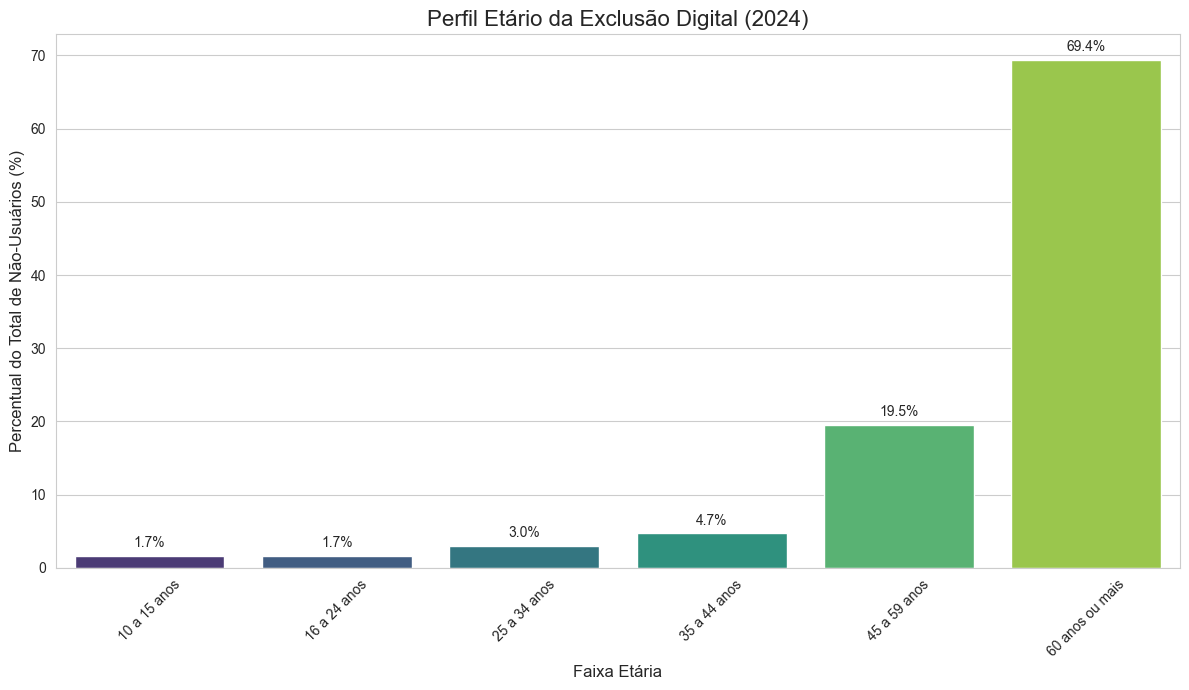

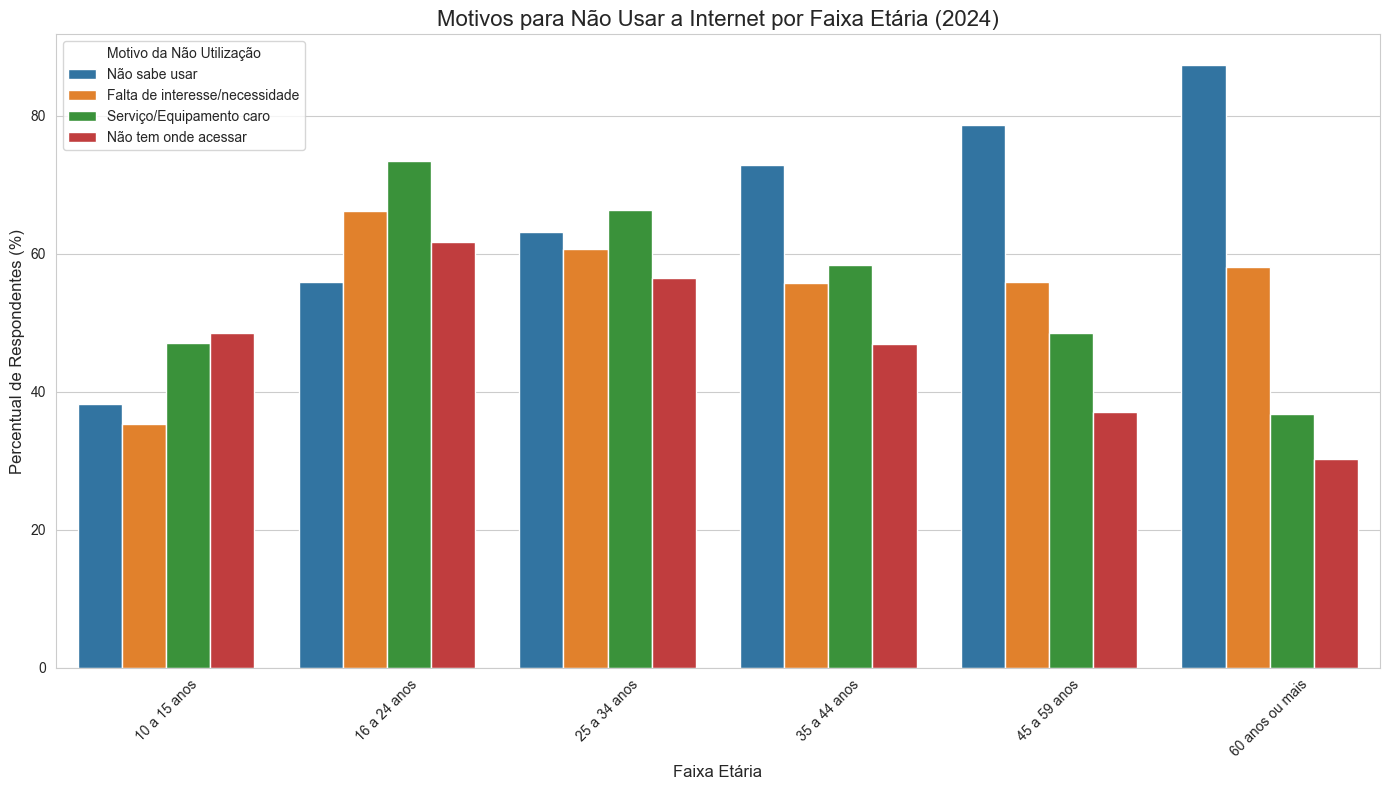

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar o DataFrame para incluir apenas os não-usuários de internet (C1 == 0)
nao_usuarios_df = tic_domicilios_2024_df[tic_domicilios_2024_df['C1'] == 0].copy()

# --- Parte 1: Análise da Faixa Etária dos Não-Usuários ---

# Mapear os códigos da variável FAIXA_ETARIA para seus rótulos
faixa_etaria_map = {
    1: '10 a 15 anos',
    2: '16 a 24 anos',
    3: '25 a 34 anos',
    4: '35 a 44 anos',
    5: '45 a 59 anos',
    6: '60 anos ou mais'
}
nao_usuarios_df['Faixa Etária'] = nao_usuarios_df['FAIXA_ETARIA'].map(faixa_etaria_map)

# Calcular a porcentagem de não-usuários em cada faixa etária
distribuicao_idade = nao_usuarios_df['Faixa Etária'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()
distribuicao_idade = distribuicao_idade.rename(columns={'index': 'Faixa Etária'})

# Ordenar as faixas etárias para o gráfico
ordem_idade = ['10 a 15 anos', '16 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 59 anos', '60 anos ou mais']
distribuicao_idade['Faixa Etária'] = pd.Categorical(distribuicao_idade['Faixa Etária'], categories=ordem_idade, ordered=True)
distribuicao_idade = distribuicao_idade.sort_values('Faixa Etária')

print("--- Distribuição de Idade entre Pessoas que NUNCA Usaram a Internet ---")
print(distribuicao_idade.to_string(index=False))

# Gerar o gráfico da Parte 1
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax1 = sns.barplot(x='Faixa Etária', y='Porcentagem', data=distribuicao_idade, palette='viridis')
ax1.set_title('Perfil Etário da Exclusão Digital (2024)', fontsize=16)
ax1.set_xlabel('Faixa Etária', fontsize=12)
ax1.set_ylabel('Percentual do Total de Não-Usuários (%)', fontsize=12)
plt.xticks(rotation=45)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.savefig('Imagens/faixa_etaria_nao_usuarios.png')
print("\nGráfico do perfil etário salvo como 'faixa_etaria_nao_usuarios.png'.")


# --- Parte 2: Análise dos Motivos de Não Uso por Faixa Etária (Lógica corrigida conforme sua sugestão) ---

# Colunas dos motivos (sem alteração)
motivos_cols = {
    'C2_J': 'Não sabe usar',
    'C2_I': 'Falta de interesse/necessidade',
    'C2_E': 'Serviço/Equipamento caro',
    'C2_D': 'Não tem onde acessar'
}
colunas_motivos_ids = list(motivos_cols.keys())

# --- CORREÇÃO APLICADA AQUI ---
# Criamos um DataFrame temporário para a análise
df_motivos_total = nao_usuarios_df[['Faixa Etária'] + colunas_motivos_ids].copy()

# Para cada coluna de motivo, vamos remapear os valores:
# Resposta 'Sim' (código 1) vira o número 1.
# Resposta 'Não' (código 2) vira o número 0.
# Resposta 'Não se aplica' (código 99) também vira 0, pois não é uma resposta afirmativa.
for col in colunas_motivos_ids:
    df_motivos_total[col] = df_motivos_total[col].map({1: 1, 2: 0, 99: 0})

# 1. Contar o total de pessoas em cada faixa etária de não-usuários
total_por_faixa = df_motivos_total.groupby('Faixa Etária').size()

# 2. Somar as respostas 'Sim' (agora que 'Não' e 'N/A' são 0, a soma conta apenas os 'Sim')
soma_sim_por_faixa = df_motivos_total.groupby('Faixa Etária')[colunas_motivos_ids].sum()

# 3. Dividir a soma de 'Sim' pelo total de pessoas na faixa (exatamente como você sugeriu)
motivos_proporcao_total = soma_sim_por_faixa.div(total_por_faixa, axis=0).mul(100)

# Renomear colunas para o gráfico
motivos_proporcao_total = motivos_proporcao_total.rename(columns=motivos_cols)
# --- FIM DA CORREÇÃO ---


# Reformatar os dados para a plotagem
motivos_long_df_total = motivos_proporcao_total.reset_index().melt(
    id_vars='Faixa Etária',
    var_name='Motivo',
    value_name='Porcentagem'
)

print("\n--- Percentual de Não-Usuários que Apontam Cada Motivo (em relação ao TOTAL de não-usuários da faixa etária) ---")
print(motivos_proporcao_total)

# Gerar o gráfico com os dados corretos
plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x='Faixa Etária', y='Porcentagem', hue='Motivo', data=motivos_long_df_total)
ax2.set_title('Motivos para Não Usar a Internet por Faixa Etária (2024)', fontsize=16)
ax2.set_xlabel('Faixa Etária', fontsize=12)
ax2.set_ylabel('Percentual de Respondentes (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Motivo da Não Utilização')
plt.tight_layout()
plt.savefig('Imagens/razoes_por_idade_nao_usuarios_final.png')
print("\nGráfico dos motivos por idade salvo como 'razoes_por_idade_nao_usuarios_final.png'.")

Com os gráficos dados, podemos perceber três coisas importantes:

1 - A falta de interesse é um dos fatores para a exclusão. Sendo, na verdade, o principal motivo para a exclusão digital entre os jovens para a faixa de 10 a 34 anos, onde essa é a razão mais citada. A partir daí, sua importância diminui, enquanto "Não sabe usar" cresce até se tornar dominante nos 60+. Portanto, a falta de interesse não é o menor fator, mas sim um dos mais críticos, especialmente para as gerações mais novas.

2 - Com a gama de informações constantes é necessário mostrar para esta parte da população que não vê interesse a facilidade que o uso da internet pode trazer para suas vidas, uma vez que isto ocorra apenas pela falta de conhecimento de suas vantagens.

3 - As demais razões ("Não saber usar", "Serviço/Equipamento caro", "Não tem onde acessar") são os grandes males da exclusão digital, pois demonstram três fatores importantes, ainda mais quando consideramos as faixas etárias dos idodos (que representam mais da metade dos não-usuários):

- A falta de acesso se dá pelo não conhecimento de como utilizar algo que, olhando para as idades mais novas, é tão simples e até mesmo banal
- O preço dos equipamentos podem ser, de fato, caros para regiões afastadas nas ou das cidades, mas isto também pode ser um fato a parte, como achar que o uso de internet é simples e desnecessário, portanto todos os planos se tornam caros (sendo este um fator pessoal causado pelos pontos 1 e 2), ainda mais quando olhamos o quão extrema é esta coluna no gráfico de 60 anos ou mais
- Não ter onde usar é outro fator alarmante, pois pode envolver não somente a renda do não-usuário (para comprar tablets, celulares, etc e até o uso dos planos), mas a facilidade do acesso dele e de onde ele mora para o uso.

Vamos agora analisar a faixa etária dos não-usuários

C:\Users\ \AppData\Local\Temp\ \742831505.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_usuarios_por_renda['Renda Familiar'] = pd.Categorical(nao_usuarios_por_renda['Renda Familiar'], categories=ordem_renda, ordered=True)
C:\Users\ \AppData\Local\Temp\ \742831505.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


--- Taxa de Exclusão Digital por Faixa de Renda Familiar (2024) ---
       Renda Familiar Usa_Internet  Porcentagem
         Até R$ 1.412          Não    25.997300
  R$ 1.412 a R$ 2.824          Não    19.344262
  R$ 2.824 a R$ 4.236          Não    10.062457
  R$ 4.236 a R$ 7.060          Não     5.098789
 R$ 7.060 a R$ 14.120          Não     4.670330
R$ 14.120 a R$ 28.240          Não     5.847953
    Mais de R$ 28.240          Não     1.886792


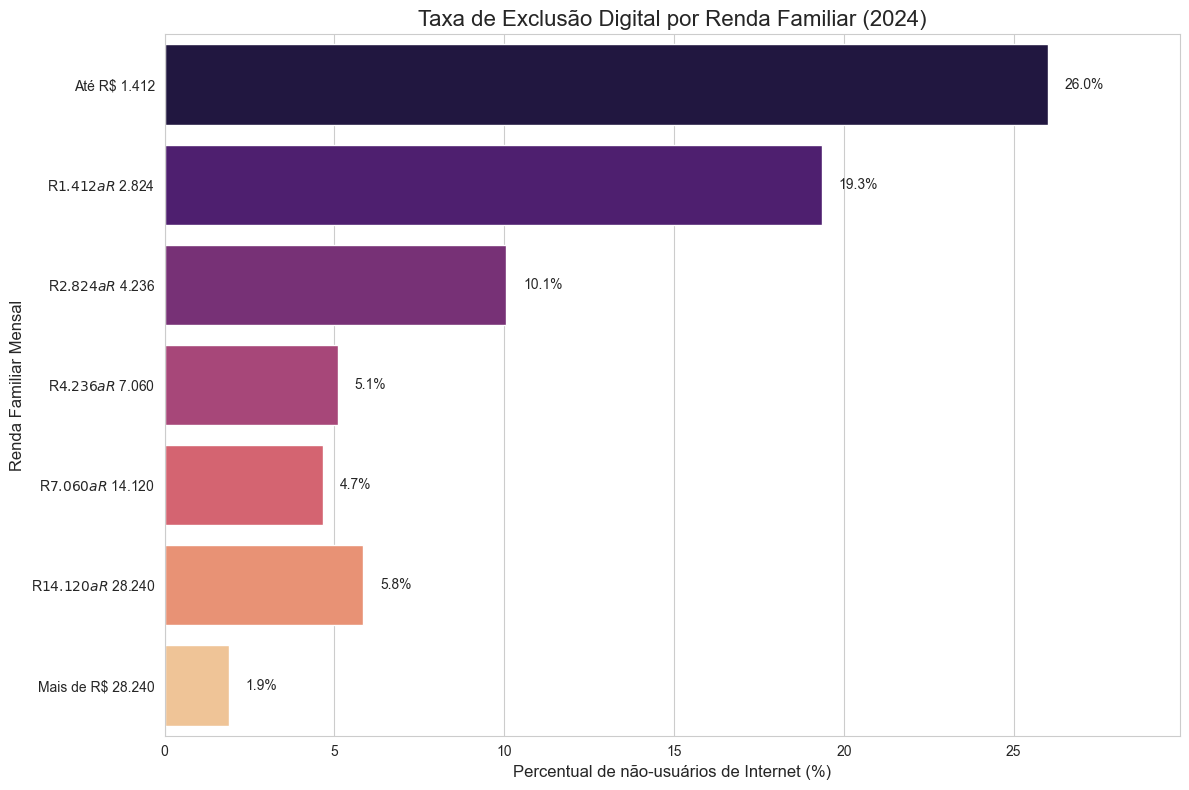

In [9]:
# 1. Criar uma cópia para a análise
df_renda = tic_domicilios_2024_df.copy()

# 2. Mapear os códigos da variável RENDA_FAMILIAR e C1
renda_map = {
    1: 'Até R$ 1.412',
    2: 'R$ 1.412 a R$ 2.824',
    3: 'R$ 2.824 a R$ 4.236',
    4: 'R$ 4.236 a R$ 7.060',
    5: 'R$ 7.060 a R$ 14.120',
    6: 'R$ 14.120 a R$ 28.240',
    7: 'Mais de R$ 28.240'
    # Ignoraremos os códigos 97 e 98 (Não sabe/Não respondeu)
}
c1_map = {0: 'Não', 1: 'Sim'}

df_renda['Renda Familiar'] = df_renda['RENDA_FAMILIAR'].map(renda_map)
df_renda['Usa_Internet'] = df_renda['C1'].map(c1_map)

# Remover as linhas onde a renda não foi informada para não poluir a análise
df_renda.dropna(subset=['Renda Familiar'], inplace=True)

# 3. Calcular a taxa de exclusão para cada faixa de renda
proporcao_por_renda = df_renda.groupby('Renda Familiar')['Usa_Internet'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# Filtrar para manter apenas a informação dos não-usuários ('Não')
nao_usuarios_por_renda = proporcao_por_renda[proporcao_por_renda['Usa_Internet'] == 'Não']

# Ordenar as faixas de renda para o gráfico
ordem_renda = list(renda_map.values())
nao_usuarios_por_renda['Renda Familiar'] = pd.Categorical(nao_usuarios_por_renda['Renda Familiar'], categories=ordem_renda, ordered=True)
nao_usuarios_por_renda = nao_usuarios_por_renda.sort_values('Renda Familiar')

# 4. Exibir a tabela de resultados
print("--- Taxa de Exclusão Digital por Faixa de Renda Familiar (2024) ---")
print(nao_usuarios_por_renda.to_string(index=False))

# 5. Gerar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='Porcentagem', 
    y='Renda Familiar', 
    data=nao_usuarios_por_renda, 
    palette='magma'
)

# Adicionar os valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 0.5, 
        p.get_y() + p.get_height() / 2, 
        f'{width:.1f}%', 
        va='center'
    )

plt.title('Taxa de Exclusão Digital por Renda Familiar (2024)', fontsize=16)
plt.xlabel('Percentual de não-usuários de Internet (%)', fontsize=12)
plt.ylabel('Renda Familiar Mensal', fontsize=12)
plt.xlim(0, nao_usuarios_por_renda['Porcentagem'].max() * 1.15)
plt.tight_layout()

# Salvar a imagem
plt.savefig('Imagens/exclusao_digital_por_renda.png')

Do total de pessoas que não usam a internet, qual a porcentagem que pertence a cada faixa de renda?

--- Composição da Renda Familiar do Grupo de NÃO-USUÁRIOS de Internet ---
           Renda Familiar  Porcentagem
      Até 1 SM (R$ 1.412)    52.936766
   De 1 a 2 SM (R$ 2.824)    28.017996
   De 2 a 3 SM (R$ 4.236)     7.248188
   De 3 a 5 SM (R$ 7.060)     1.999500
 De 5 a 10 SM (R$ 14.120)     0.849788
De 10 a 20 SM (R$ 28.240)     0.249938
            Mais de 20 SM     0.024994
                      NaN     5.348663
                      NaN     3.324169

Percentual de não-usuários que ganham até 2 salários mínimos: 80.95%


C:\Users\ \AppData\Local\Temp\ \1273629032.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Porcentagem', y='Renda Familiar', data=composicao_renda_df, palette='plasma', orient='h')



Gráfico da composição de renda dos não-usuários salvo como 'composicao_renda_nao_usuarios.png'.


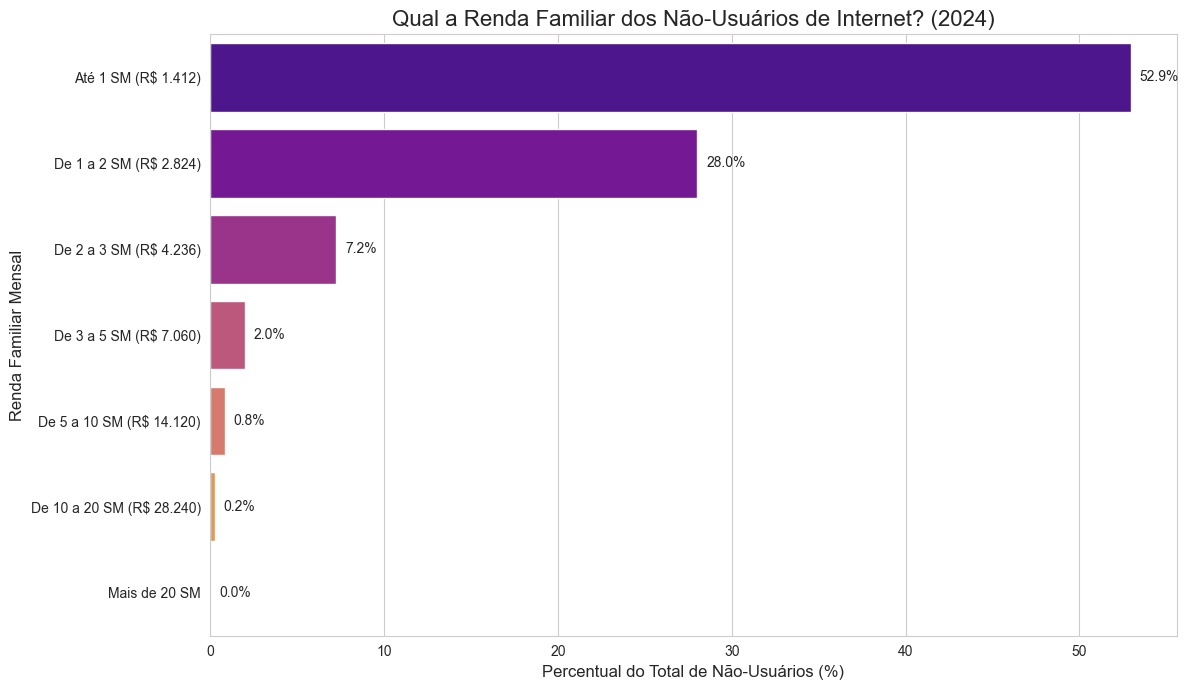

In [10]:
# 1. Filtrar o DataFrame para selecionar APENAS os não-usuários de internet
nao_usuarios_df = tic_domicilios_2024_df[tic_domicilios_2024_df['C1'] == 0].copy()

# 2. Mapear os códigos da variável RENDA_FAMILIAR
renda_map = {
    1: 'Até 1 SM (R$ 1.412)',
    2: 'De 1 a 2 SM (R$ 2.824)',
    3: 'De 2 a 3 SM (R$ 4.236)',
    4: 'De 3 a 5 SM (R$ 7.060)',
    5: 'De 5 a 10 SM (R$ 14.120)',
    6: 'De 10 a 20 SM (R$ 28.240)',
    7: 'Mais de 20 SM',
    97: 'Não sabe',
    98: 'Não respondeu'
}
nao_usuarios_df['Renda Familiar'] = nao_usuarios_df['RENDA_FAMILIAR'].map(renda_map)

# Filtrar rendas não declaradas para focar a análise
nao_usuarios_df = nao_usuarios_df[nao_usuarios_df['RENDA_FAMILIAR'].isin(['Não sabe', 'Não respondeu']) == False]


# 3. Calcular a distribuição (composição) de renda DENTRO do grupo de não-usuários
composicao_renda = nao_usuarios_df['Renda Familiar'].value_counts(normalize=True).mul(100)
composicao_renda_df = composicao_renda.reset_index()
composicao_renda_df.columns = ['Renda Familiar', 'Porcentagem']

# Ordenar as faixas de renda para o gráfico
ordem_renda = [
    'Até 1 SM (R$ 1.412)',
    'De 1 a 2 SM (R$ 2.824)',
    'De 2 a 3 SM (R$ 4.236)',
    'De 3 a 5 SM (R$ 7.060)',
    'De 5 a 10 SM (R$ 14.120)',
    'De 10 a 20 SM (R$ 28.240)',
    'Mais de 20 SM'
]
composicao_renda_df['Renda Familiar'] = pd.Categorical(composicao_renda_df['Renda Familiar'], categories=ordem_renda, ordered=True)
composicao_renda_df = composicao_renda_df.sort_values('Renda Familiar')


print("--- Composição da Renda Familiar do Grupo de NÃO-USUÁRIOS de Internet ---")
print(composicao_renda_df.to_string(index=False))

# Somar as duas primeiras faixas para confirmar a observação
soma_ate_2sm = composicao_renda_df[composicao_renda_df['Renda Familiar'].isin(['Até 1 SM (R$ 1.412)', 'De 1 a 2 SM (R$ 2.824)'])]['Porcentagem'].sum()
print(f"\nPercentual de não-usuários que ganham até 2 salários mínimos: {soma_ate_2sm:.2f}%")


# 4. Gerar o gráfico
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(x='Porcentagem', y='Renda Familiar', data=composicao_renda_df, palette='plasma', orient='h')

ax.set_title('Qual a Renda Familiar dos Não-Usuários de Internet? (2024)', fontsize=16)
ax.set_xlabel('Percentual do Total de Não-Usuários (%)', fontsize=12)
ax.set_ylabel('Renda Familiar Mensal', fontsize=12)
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2,
             f'{width:.1f}%', va='center')

plt.tight_layout()
plt.savefig('Imagens/composicao_renda_nao_usuarios.png')
print("\nGráfico da composição de renda dos não-usuários salvo como 'composicao_renda_nao_usuarios.png'.")

Percebe-se então que a maioria dos não-usuários ganha até dois salários mínimos. Isto nos prova que, considerando o gráfico razoes_por_idade_nao_usuarios.png', a exclusão digital não é causada apenas por uma falta de acessibilidade sobre o como usar e a falta de conhecimento do que a rede pode ser útil. A maioria deles ganha pouco e isto impacta em sua escolha ou não escolha 

Mas será que a região também influência nisso?

--- Taxa de Exclusão Digital por Região e Faixa Etária (2024) ---
      Região    Faixa Etária Usa_Internet  Porcentagem
Centro-Oeste    10 a 15 anos          Não     5.084746
Centro-Oeste    16 a 24 anos          Não     2.203857
Centro-Oeste    25 a 34 anos          Não     2.191235
Centro-Oeste    35 a 44 anos          Não     5.882353
Centro-Oeste    45 a 59 anos          Não     9.715026
Centro-Oeste 60 anos ou mais          Não    49.650350
    Nordeste    10 a 15 anos          Não     3.524229
    Nordeste    16 a 24 anos          Não     1.179941
    Nordeste    25 a 34 anos          Não     2.616034
    Nordeste    35 a 44 anos          Não     7.793522
    Nordeste    45 a 59 anos          Não    21.300058
    Nordeste 60 anos ou mais          Não    50.259067
       Norte    10 a 15 anos          Não     9.503240
       Norte    16 a 24 anos          Não     5.000000
       Norte    25 a 34 anos          Não     6.294964
       Norte    35 a 44 anos          Não     9.102564

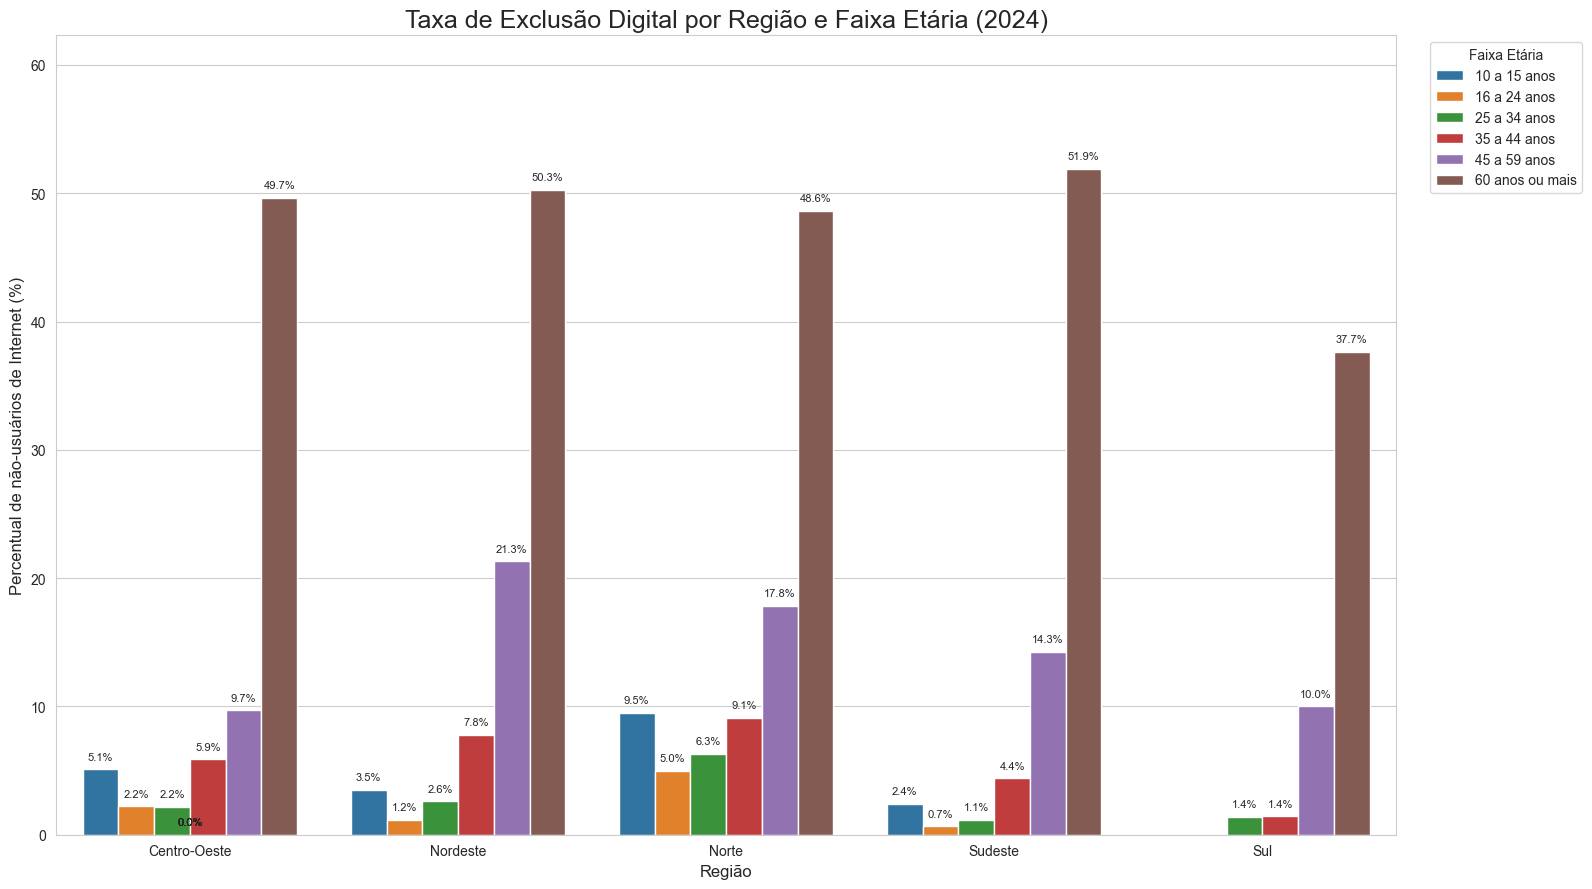

In [11]:
# 1. Mapear todas as variáveis categóricas para seus rótulos
df_analise_regional_idade = tic_domicilios_2024_df.copy()

regiao_map = {1: 'Sudeste', 2: 'Nordeste', 3: 'Sul', 4: 'Norte', 5: 'Centro-Oeste'}
faixa_etaria_map = {
    1: '10 a 15 anos',
    2: '16 a 24 anos',
    3: '25 a 34 anos',
    4: '35 a 44 anos',
    5: '45 a 59 anos',
    6: '60 anos ou mais'
}
c1_map = {0: 'Não', 1: 'Sim'}

df_analise_regional_idade['Região'] = df_analise_regional_idade['COD_REGIAO_2'].map(regiao_map)
df_analise_regional_idade['Faixa Etária'] = df_analise_regional_idade['FAIXA_ETARIA'].map(faixa_etaria_map)
df_analise_regional_idade['Usa_Internet'] = df_analise_regional_idade['C1'].map(c1_map)

# 2. Agrupar por Região E Faixa Etária, e calcular a proporção de não-usuários
proporcao_detalhada = df_analise_regional_idade.groupby(['Região', 'Faixa Etária'])['Usa_Internet'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# 3. Filtrar para manter apenas a informação dos não-usuários ('Não')
nao_usuarios_detalhado = proporcao_detalhada[proporcao_detalhada['Usa_Internet'] == 'Não']

print("--- Taxa de Exclusão Digital por Região e Faixa Etária (2024) ---")
print(nao_usuarios_detalhado.to_string(index=False))

# 4. Gerar o gráfico de barras agrupado para comparar
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='Região', 
    y='Porcentagem', 
    hue='Faixa Etária', 
    data=nao_usuarios_detalhado
)

# Adicionar os valores nas barras para clareza
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=8)

plt.title('Taxa de Exclusão Digital por Região e Faixa Etária (2024)', fontsize=18)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Percentual de não-usuários de Internet (%)', fontsize=12)
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylim(0, nao_usuarios_detalhado['Porcentagem'].max() * 1.2) # Ajuste de altura para os rótulos
plt.tight_layout()

# Salvar a imagem
plt.savefig('Imagens/exclusao_digital_por_regiao_e_idade.png')

print("\nGráfico detalhado salvo como 'exclusao_digital_por_regiao_e_idade.png'.")

Dentro de cada região, qual é a taxa de não-usuários para cada faixa de renda familiar?

C:\Users\ \AppData\Local\Temp\ \676305.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_usuarios_renda_regiao['Renda Familiar'] = pd.Categorical(
c:\Users\ \AppData\Local\Programs\Python\Python313\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname SM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Gerando o gráfico com a ordem correta no eixo X...
Gráfico corrigido e salvo como 'exclusao_renda_por_regiao.png'.


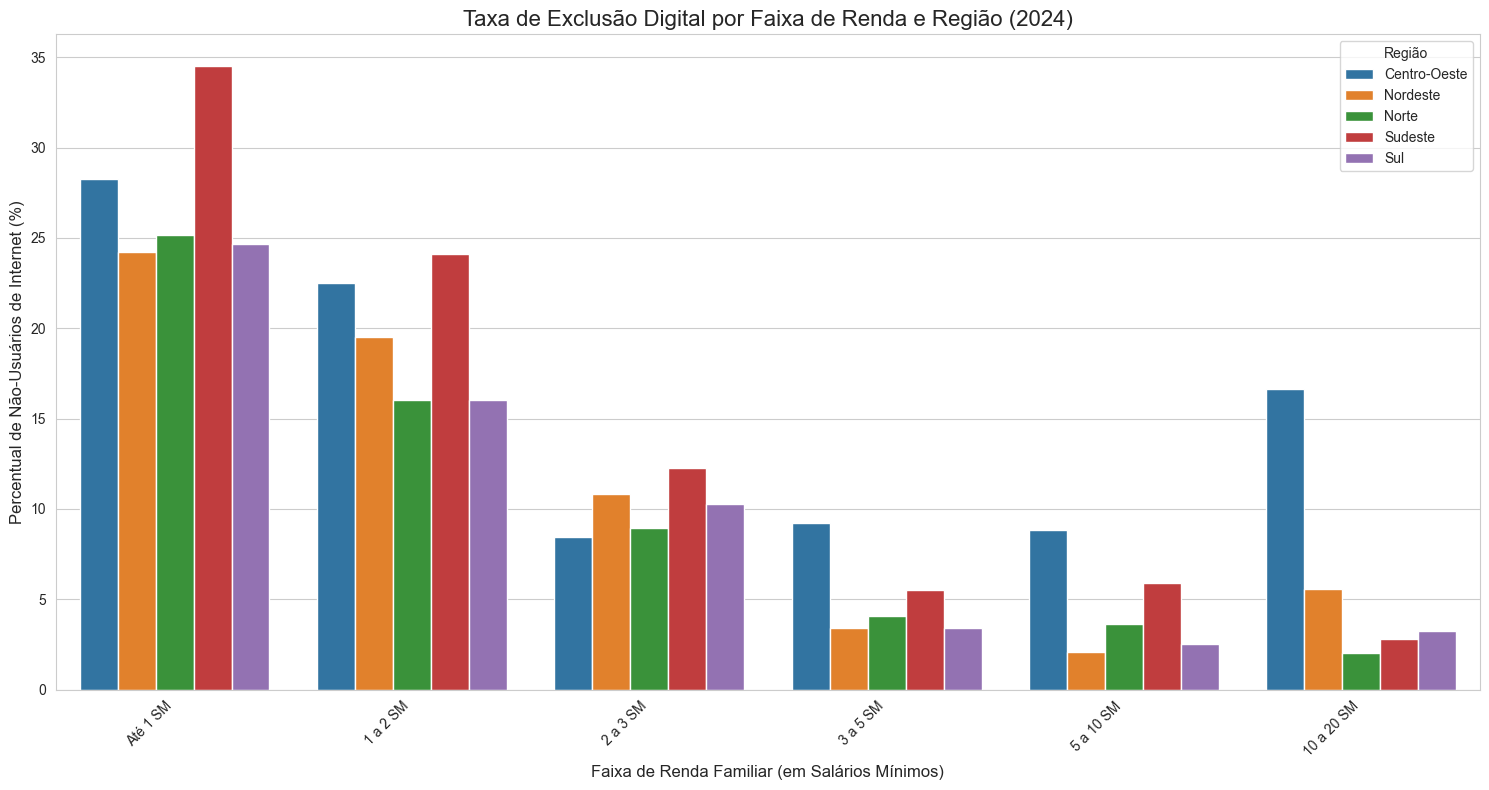

In [20]:
# --- Preparação dos Dados (Mapeamento) ---
df_analise_renda_regiao = tic_domicilios_2024_df.copy()

regiao_map = {1: 'Sudeste', 2: 'Nordeste', 3: 'Sul', 4: 'Norte', 5: 'Centro-Oeste'}
renda_map = {
    1: "Até 1 SM",
    2: "1 a 2 SM",
    3: "2 a 3 SM",
    4: "3 a 5 SM",
    5: "5 a 10 SM",
    6: "10 a 20 SM",
    7: "Mais de 20 SM",
    97: "Não sabe",
    98: "Não respondeu"
}
c1_map = {0: 'Não', 1: 'Sim'}

df_analise_renda_regiao['Região'] = df_analise_renda_regiao['COD_REGIAO_2'].map(regiao_map)
df_analise_renda_regiao['Renda Familiar'] = df_analise_renda_regiao['RENDA_FAMILIAR'].map(renda_map)
df_analise_renda_regiao['Usa_Internet'] = df_analise_renda_regiao['C1'].map(c1_map)

# Filtrar rendas não respondidas
df_analise_renda_regiao = df_analise_renda_regiao[df_analise_renda_regiao['RENDA_FAMILIAR'].isin(["Não sabe", "Não respondeu"]) == False]

# --- Cálculo dos Dados ---
proporcao_renda_regiao = df_analise_renda_regiao.groupby(['Região', 'Renda Familiar'])['Usa_Internet'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()
nao_usuarios_renda_regiao = proporcao_renda_regiao[proporcao_renda_regiao['Usa_Internet'] == 'Não']

# 1. Definir a ordem correta das categorias de renda
ordem_renda = [
    "Até 1 SM",
    "1 a 2 SM",
    "2 a 3 SM",
    "3 a 5 SM",
    "5 a 10 SM",
    "10 a 20 SM"
]

# 2. Aplicar a ordem à coluna do DataFrame
nao_usuarios_renda_regiao['Renda Familiar'] = pd.Categorical(
    nao_usuarios_renda_regiao['Renda Familiar'],
    categories=ordem_renda,
    ordered=True
)

# --- Geração do Gráfico Corrigido ---
print("Gerando o gráfico com a ordem correta no eixo X...")
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='Renda Familiar',
    y='Porcentagem',
    hue='Região',
    data=nao_usuarios_renda_regiao
)

ax.set_title('Taxa de Exclusão Digital por Faixa de Renda e Região (2024)', fontsize=16)
ax.set_xlabel('Faixa de Renda Familiar (em Salários Mínimos)', fontsize=12)
ax.set_ylabel('Percentual de Não-Usuários de Internet (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os labels para não sobrepor
plt.legend(title='Região')
plt.tight_layout()

# Salvar a imagem
plt.savefig('Imagens/exclusao_renda_por_regiao.png')

print("Gráfico corrigido e salvo como 'exclusao_renda_por_regiao.png'.")

O gráfico é uma prova visual contundente de que a exclusão digital no Brasil é, fundamentalmente, uma barreira econômica. Enquanto outros fatores como idade e escolaridade são importantes, a capacidade financeira de uma família é um dos principais determinantes para que seus membros tenham ou não acesso à internet. A análise mostra que, no Brasil de 2024, quanto maior o salário, menor a exclusão.

Até agora, focamos na divisão entre quem usa e quem não usa a internet. Mas existe uma "exclusão digital secundária": a das pessoas que acessam a internet, mas de forma precária.  análise final é sobre a qualidade do acesso, respondendo à pergunta:

"Qual é o perfil (por renda e escolaridade) das pessoas que acessam a internet exclusivamente pelo celular?"

Isso é importante porque o acesso apenas pelo celular pode limitar a realização de tarefas mais complexas (estudar, trabalhar, etc.). Esta análise nos daria uma visão mais completa do "abismo digital".

C:\Users\ \AppData\Local\Temp\ \2951746461.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuarios_df_renda['Renda Familiar'] = pd.Categorical(usuarios_df_renda['Renda Familiar'], categories=ordem_renda, ordered=True)
C:\Users\ \AppData\Local\Temp\ \2951746461.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_renda = usuarios_df_renda.groupby('Renda Familiar')['Perfil_Acesso'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()


--- Proporção do Perfil de Acesso por Faixa de Renda ---
   Renda Familiar   Perfil_Acesso  Porcentagem
0        Até 1 SM  Apenas Celular    89.966496
1        Até 1 SM  Usa Computador    10.033504
2     De 1 a 2 SM  Apenas Celular    80.026690
3     De 1 a 2 SM  Usa Computador    19.973310
4     De 2 a 3 SM  Apenas Celular    66.483516
5     De 2 a 3 SM  Usa Computador    33.516484
6     De 3 a 5 SM  Apenas Celular    51.556157
7     De 3 a 5 SM  Usa Computador    48.443843
8    De 5 a 10 SM  Usa Computador    64.087591
9    De 5 a 10 SM  Apenas Celular    35.912409
10  De 10 a 20 SM  Usa Computador    68.750000
11  De 10 a 20 SM  Apenas Celular    31.250000
12  Mais de 20 SM  Usa Computador    67.307692
13  Mais de 20 SM  Apenas Celular    32.692308

Gráfico de Acesso por Renda salvo como 'acesso_por_renda.png'.

--- Proporção do Perfil de Acesso por Grau de Instrução ---
          Grau de Instrução   Perfil_Acesso  Porcentagem
0   Analfabeto/Lê e escreve  Apenas Celular    99.473684

C:\Users\ \AppData\Local\Temp\ \2951746461.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuarios_df_escolaridade['Grau de Instrução'] = pd.Categorical(usuarios_df_escolaridade['Grau de Instrução'], categories=ordem_escolaridade, ordered=True)
C:\Users\ \AppData\Local\Temp\ \2951746461.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_escolaridade = usuarios_df_escolaridade.groupby('Grau de Instrução')['Perfil_Acesso'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()



Gráfico de Acesso por Grau de Instrução salvo como 'acesso_por_escolaridade.png'.


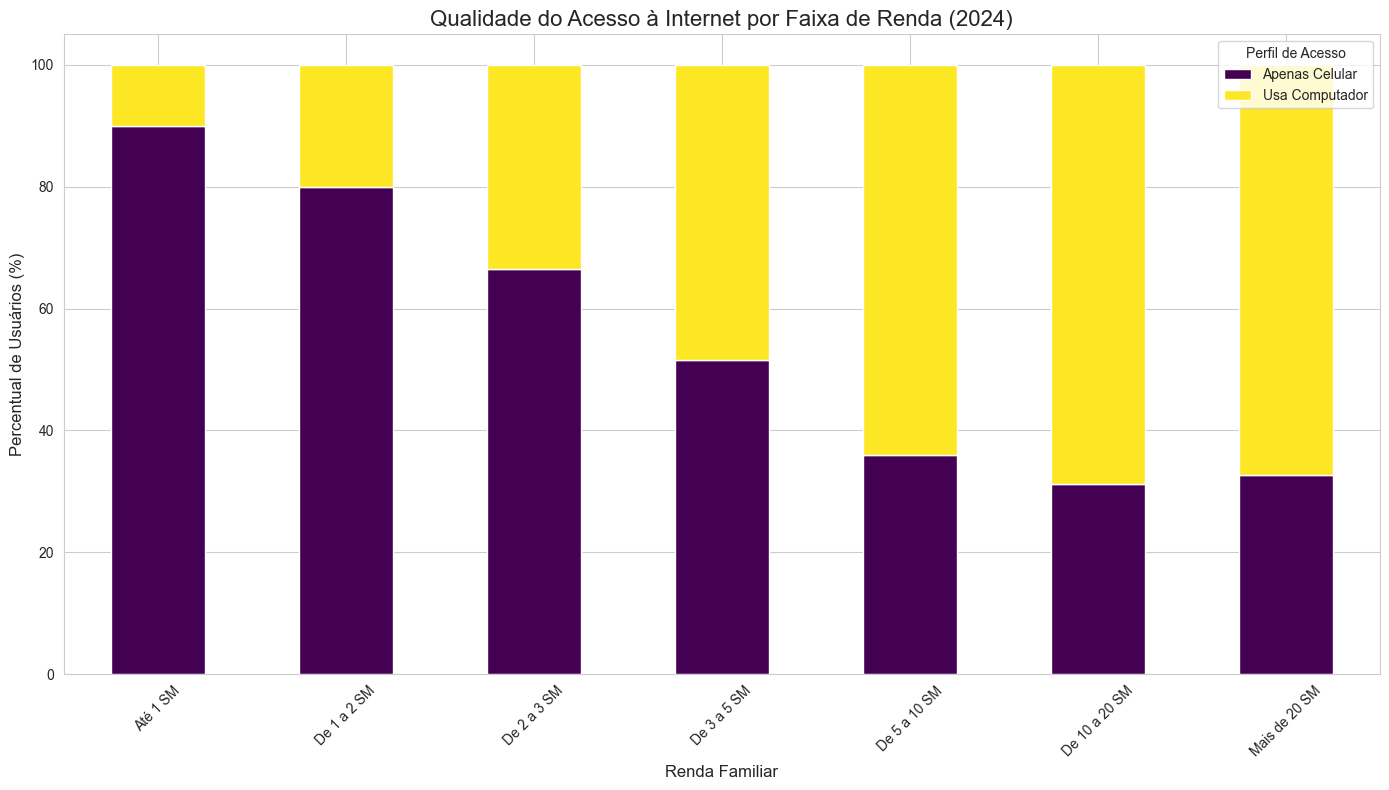

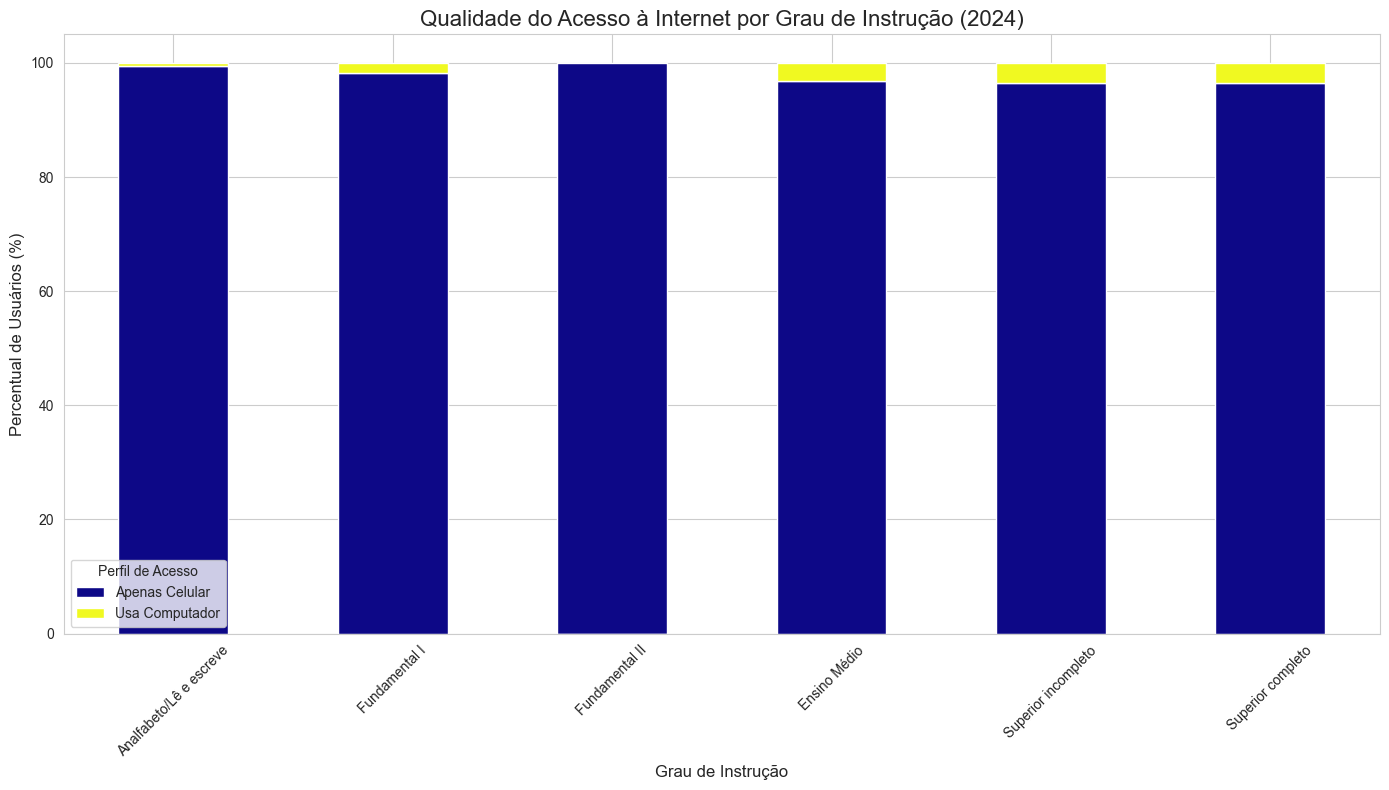

In [13]:
# 1. Filtrar para trabalhar apenas com usuários de internet (C1 == 1)
usuarios_df = tic_domicilios_2024_df[tic_domicilios_2024_df['C1'] == 1].copy()

# 2. Criar a nova variável "Perfil de Acesso"
# Condição para "Usa Computador": C5_A (desktop) == 1 OU C5_B (notebook) == 1
condicao_usa_pc = (usuarios_df['C5_A'] == 1) | (usuarios_df['C5_B'] == 1)

# Condição para "Apenas Celular": C5_D (celular) == 1 E NÃO usa computador
condicao_so_celular = (usuarios_df['C5_D'] == 1) & (~condicao_usa_pc)

# Aplicar as condições para criar a coluna
usuarios_df['Perfil_Acesso'] = np.select(
    [condicao_usa_pc, condicao_so_celular],
    ['Usa Computador', 'Apenas Celular'],
    default='Outro' # Casos residuais (ex: apenas TV)
)

# Filtrar para manter apenas os dois perfis principais que queremos comparar
usuarios_df_filtrado = usuarios_df[usuarios_df['Perfil_Acesso'].isin(['Usa Computador', 'Apenas Celular'])].copy()

# --- 3. Análise por Faixa de Renda ---

# Mapear a Renda Familiar
renda_map = {
    1: 'Até 1 SM',
    2: 'De 1 a 2 SM',
    3: 'De 2 a 3 SM',
    4: 'De 3 a 5 SM',
    5: 'De 5 a 10 SM',
    6: 'De 10 a 20 SM',
    7: 'Mais de 20 SM',
}
usuarios_df_filtrado['Renda Familiar'] = usuarios_df_filtrado['RENDA_FAMILIAR'].map(renda_map)

# Filtrar rendas não respondidas e ordenar
usuarios_df_renda = usuarios_df_filtrado.dropna(subset=['Renda Familiar'])
ordem_renda = ['Até 1 SM', 'De 1 a 2 SM', 'De 2 a 3 SM', 'De 3 a 5 SM', 'De 5 a 10 SM', 'De 10 a 20 SM', 'Mais de 20 SM']
usuarios_df_renda['Renda Familiar'] = pd.Categorical(usuarios_df_renda['Renda Familiar'], categories=ordem_renda, ordered=True)

# Calcular a proporção de cada perfil dentro de cada faixa de renda
proporcao_renda = usuarios_df_renda.groupby('Renda Familiar')['Perfil_Acesso'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

print("--- Proporção do Perfil de Acesso por Faixa de Renda ---")
print(proporcao_renda)

# Gerar o gráfico de barras 100% empilhadas
# Para isso, pivotamos a tabela
renda_pivot = proporcao_renda.pivot(index='Renda Familiar', columns='Perfil_Acesso', values='Porcentagem')
renda_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Qualidade do Acesso à Internet por Faixa de Renda (2024)', fontsize=16)
plt.xlabel('Renda Familiar', fontsize=12)
plt.ylabel('Percentual de Usuários (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Perfil de Acesso')
plt.tight_layout()
plt.savefig('Imagens/acesso_por_renda.png')
print("\nGráfico de Acesso por Renda salvo como 'acesso_por_renda.png'.")


# --- 4. Análise por Grau de Instrução ---

# Mapear Grau de Instrução
grau_instrucao_map = {
    1: 'Analfabeto/Lê e escreve',
    2: 'Fundamental I',
    3: 'Fundamental II',
    4: 'Ensino Médio',
    5: 'Superior incompleto',
    6: 'Superior completo',
}
usuarios_df_filtrado['Grau de Instrução'] = usuarios_df_filtrado['GRAU_INSTRUCAO_1'].map(grau_instrucao_map)

# Filtrar escolaridades não respondidas e ordenar
usuarios_df_escolaridade = usuarios_df_filtrado.dropna(subset=['Grau de Instrução'])
ordem_escolaridade = ['Analfabeto/Lê e escreve', 'Fundamental I', 'Fundamental II', 'Ensino Médio', 'Superior incompleto', 'Superior completo']
usuarios_df_escolaridade['Grau de Instrução'] = pd.Categorical(usuarios_df_escolaridade['Grau de Instrução'], categories=ordem_escolaridade, ordered=True)

# Calcular a proporção de cada perfil dentro de cada grau de instrução
proporcao_escolaridade = usuarios_df_escolaridade.groupby('Grau de Instrução')['Perfil_Acesso'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

print("\n--- Proporção do Perfil de Acesso por Grau de Instrução ---")
print(proporcao_escolaridade)

# Gerar o gráfico de barras 100% empilhadas
escolaridade_pivot = proporcao_escolaridade.pivot(index='Grau de Instrução', columns='Perfil_Acesso', values='Porcentagem')
escolaridade_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
plt.title('Qualidade do Acesso à Internet por Grau de Instrução (2024)', fontsize=16)
plt.xlabel('Grau de Instrução', fontsize=12)
plt.ylabel('Percentual de Usuários (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Perfil de Acesso')
plt.tight_layout()
plt.savefig('Imagens/acesso_por_escolaridade.png')
print("\nGráfico de Acesso por Grau de Instrução salvo como 'acesso_por_escolaridade.png'.")

Com os gráficos dados e a análise feita, percebemos que apesar do uso de computadores aumentar drasticamente conforme a faixa de renda, quando trazemos isto para o grau de instituição percebemos que este aumento, infelizmente, é minúsculo, e isto pode ser umas reflexão na disparidade de pessoas que ganham muito e as que ganham pouco estudando nas diferentes etapas.

### Pré-Processamento dos Dados

In [14]:
# 1. Selecionar as colunas que usaremos como features (preditores) e a variável alvo
features = [
    'RENDA_FAMILIAR',
    'GRAU_INSTRUCAO_1',
    'AREA',
    'COD_REGIAO_2'
]
target = 'C1'

df_modelo = tic_domicilios_2024_df[features + [target]].copy()

# 2. Limpar os dados
# Remover linhas onde a variável alvo (C1) não é 'Sim' (1) ou 'Não' (0)
df_modelo = df_modelo[df_modelo['C1'].isin([0, 1])]

# Remover linhas onde as features têm valores de "Não sabe" (97) ou "Não respondeu" (98)
# Usamos uma lista de valores a serem substituídos por NaN e depois removemos as linhas com NaN
valores_invalidos = [97, 98]
for col in features:
    # Verificando se a coluna existe antes de tentar substituir
    if col in df_modelo.columns:
        df_modelo[col] = df_modelo[col].replace(valores_invalidos, np.nan)

df_modelo.dropna(inplace=True)

# 3. Separar as features (X) da variável alvo (y)
X = df_modelo[features]
y = df_modelo[target]

# 4. Transformar Variáveis Categóricas usando One-Hot Encoding
# O pandas.get_dummies faz isso automaticamente.
# Vamos especificar quais colunas devem ser transformadas.
# A idade é numérica, então não precisa ser transformada.
colunas_categoricas = [
    'RENDA_FAMILIAR',
    'GRAU_INSTRUCAO_1',
    'AREA',
    'COD_REGIAO_2'
]

X_processado = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True)

# Adicionar a idade de volta, já que get_dummies pode tê-la removido se não foi listada
if 'IDADE' in X.columns:
    X_processado['IDADE'] = X['IDADE']


print("--- Informações do DataFrame Processado para o Modelo ---")
X_processado.info()

print("\n\n--- 5 Primeiras Linhas do DataFrame Processado ---")
print(X_processado.head().to_string())

print("\nOs dados estão agora prontos para serem usados em um modelo de regressão logística.")

--- Informações do DataFrame Processado para o Modelo ---
<class 'pandas.core.frame.DataFrame'>
Index: 19700 entries, 0 to 21169
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   RENDA_FAMILIAR_2.0   19700 non-null  bool 
 1   RENDA_FAMILIAR_3.0   19700 non-null  bool 
 2   RENDA_FAMILIAR_4.0   19700 non-null  bool 
 3   RENDA_FAMILIAR_5.0   19700 non-null  bool 
 4   RENDA_FAMILIAR_6.0   19700 non-null  bool 
 5   RENDA_FAMILIAR_7.0   19700 non-null  bool 
 6   RENDA_FAMILIAR_8.0   19700 non-null  bool 
 7   RENDA_FAMILIAR_9.0   19700 non-null  bool 
 8   GRAU_INSTRUCAO_1_2   19700 non-null  bool 
 9   GRAU_INSTRUCAO_1_3   19700 non-null  bool 
 10  GRAU_INSTRUCAO_1_4   19700 non-null  bool 
 11  GRAU_INSTRUCAO_1_5   19700 non-null  bool 
 12  GRAU_INSTRUCAO_1_6   19700 non-null  bool 
 13  GRAU_INSTRUCAO_1_7   19700 non-null  bool 
 14  GRAU_INSTRUCAO_1_8   19700 non-null  bool 
 15  GRAU_INSTRUCAO_1_

### Regressão Logística

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# --- Etapa 1: Pré-processamento com a Correção ---

# Carregar o DataFrame original com colunas relevantes
colunas_relevantes = [
    'C1', 'RENDA_FAMILIAR', 'GRAU_INSTRUCAO_1', 'IDADE', 'AREA', 'COD_REGIAO_2'
]
df = pd.read_csv('dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv', sep=';', usecols=colunas_relevantes)

# Limpeza de dados
df_limpo = df[~df['RENDA_FAMILIAR'].isin([97, 98])].copy()
df_limpo = df_limpo[~df_limpo['GRAU_INSTRUCAO_1'].isin([97, 98])].copy()

# Remover as linhas onde a própria variável alvo (C1) é "Não sabe" ou "Não respondeu"
df_limpo = df_limpo[df_limpo['C1'].isin([0, 1])].copy()


# Definir a variável alvo (y) e as features (X)
y = df_limpo['C1']
X = df_limpo.drop('C1', axis=1)

# One-Hot Encoding para variáveis categóricas
X_encoded = pd.get_dummies(X, columns=['AREA', 'COD_REGIAO_2'], drop_first=True)

# Escalonamento dos Dados
colunas_numericas = ['RENDA_FAMILIAR', 'GRAU_INSTRUCAO_1', 'IDADE']
scaler = StandardScaler()
X_processed = X_encoded.copy()
X_processed[colunas_numericas] = scaler.fit_transform(X_encoded[colunas_numericas])


# --- Etapa 2: Divisão dos Dados em Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)


# --- Etapa 3: Treinamento do Modelo ---
modelo_logistico = LogisticRegression(random_state=42)
modelo_logistico.fit(X_train, y_train)
print("Modelo de Regressão Logística treinado com sucesso!")
print("-" * 30)


# --- Etapa 4: Avaliação Final ---
y_pred = modelo_logistico.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2%}")
print("-" * 30)

print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=['Verdadeiro: Não', 'Verdadeiro: Sim'], columns=['Previsto: Não', 'Previsto: Sim']))
print("-" * 30)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Não-Usuário', 'Usuário']))

Modelo de Regressão Logística treinado com sucesso!
------------------------------
Acurácia do modelo: 84.77%
------------------------------
Matriz de Confusão:
                 Previsto: Não  Previsto: Sim
Verdadeiro: Não            316            429
Verdadeiro: Sim            171           3024
------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

 Não-Usuário       0.65      0.42      0.51       745
     Usuário       0.88      0.95      0.91      3195

    accuracy                           0.85      3940
   macro avg       0.76      0.69      0.71      3940
weighted avg       0.83      0.85      0.83      3940



Analisando as Odds:

In [16]:
df = pd.read_csv('dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv', sep=';', usecols=colunas_relevantes)
df_limpo = df[~df['RENDA_FAMILIAR'].isin([97, 98])].copy()
df_limpo = df_limpo[~df_limpo['GRAU_INSTRUCAO_1'].isin([97, 98])].copy()
df_limpo = df_limpo[df_limpo['C1'].isin([0, 1])].copy()
y = df_limpo['C1']
X = df_limpo.drop('C1', axis=1)
X_encoded = pd.get_dummies(X, columns=['AREA', 'COD_REGIAO_2'], drop_first=True)
colunas_numericas = ['RENDA_FAMILIAR', 'GRAU_INSTRUCAO_1', 'IDADE']
scaler = StandardScaler()
X_processed = X_encoded.copy()
X_processed[colunas_numericas] = scaler.fit_transform(X_encoded[colunas_numericas])

#  --- Etapa 2: Treinar o modelo novamente ---
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)
modelo_logistico = LogisticRegression(random_state=42)
modelo_logistico.fit(X_train, y_train)

# --- Etapa 3: Extrair e Analisar os Coeficientes ---
coeficientes = modelo_logistico.coef_[0]
nomes_das_variaveis = X_processed.columns
df_coeficientes = pd.DataFrame({
    'Variável': nomes_das_variaveis,
    'Coeficiente (Log-Odds)': coeficientes
})
df_coeficientes['Odds Ratio'] = np.exp(df_coeficientes['Coeficiente (Log-Odds)'])
df_coeficientes['Impacto'] = abs(df_coeficientes['Coeficiente (Log-Odds)'])
df_coeficientes = df_coeficientes.sort_values(by='Impacto', ascending=False).drop('Impacto', axis=1)

# --- Mapear os nomes das variáveis para nomes mais legíveis ---
mapa_nomes = {
    'IDADE': 'Idade',
    'GRAU_INSTRUCAO_1': 'Grau de Instrução',
    'RENDA_FAMILIAR': 'Renda Familiar',
    'AREA_2': 'Área: Rural (vs. Urbana)',
    'COD_REGIAO_2_2': 'Região: Nordeste (vs. Sudeste)',
    'COD_REGIAO_2_3': 'Região: Sul (vs. Sudeste)',
    'COD_REGIAO_2_4': 'Região: Norte (vs. Sudeste)',
    'COD_REGIAO_2_5': 'Região: Centro-Oeste (vs. Sudeste)'
}

df_coeficientes['Variável'] = df_coeficientes['Variável'].replace(mapa_nomes)


print("--- Análise de Coeficientes do Modelo de Regressão Logística (com nomes legíveis) ---")
print(df_coeficientes.to_string(index=False))

print("\n--- Como Interpretar a Tabela ---")
print("Coeficiente > 0 (Odds Ratio > 1): Aumenta a chance de ser um usuário de internet.")
print("Coeficiente < 0 (Odds Ratio < 1): Diminui a chance de ser um usuário de internet.")
print("Quanto mais distante de 0 (coeficiente) ou 1 (Odds Ratio), mais forte é o impacto da variável.")

--- Análise de Coeficientes do Modelo de Regressão Logística (com nomes legíveis) ---
                          Variável  Coeficiente (Log-Odds)  Odds Ratio
                             Idade               -1.191550    0.303750
                 Grau de Instrução                0.779618    2.180639
         Região: Sul (vs. Sudeste)                0.641829    1.899953
Região: Centro-Oeste (vs. Sudeste)                0.332233    1.394077
                    Renda Familiar                0.290063    1.336512
          Área: Rural (vs. Urbana)               -0.262873    0.768839
    Região: Nordeste (vs. Sudeste)                0.231043    1.259913
       Região: Norte (vs. Sudeste)               -0.107898    0.897719

--- Como Interpretar a Tabela ---
Coeficiente > 0 (Odds Ratio > 1): Aumenta a chance de ser um usuário de internet.
Coeficiente < 0 (Odds Ratio < 1): Diminui a chance de ser um usuário de internet.
Quanto mais distante de 0 (coeficiente) ou 1 (Odds Ratio), mais forte é o im

Interpretando os Resultados:

Com base nesta tabela, podemos tirar conclusões muito claras sobre a dependência das variáveis:

Qual é o fator mais importante?

A IDADE é, de longe, o fator com o maior impacto no modelo. Seu coeficiente (-1.19) é o mais distante de zero. A escolaridade (0.78) vem em um segundo lugar expressivo.

Qual o impacto da Idade?

O coeficiente é negativo (-1.19) e o Odds Ratio é menor que 1 (0.30). Isso significa que, mantendo todos os outros fatores iguais, quanto mais velha uma pessoa é, menor a sua chance de ser uma usuária de internet. O impacto é muito forte.

A Escolaridade e a Renda são importantes?

Sim, e muito! Ambas têm coeficientes positivos, confirmando o que vimos na Análise Exploratória: quanto maior o grau de instrução e a renda familiar, maior a chance de a pessoa usar a internet. O Odds Ratio da escolaridade (2.18) mostra que ela tem um impacto ainda maior que o da renda (1.34) no modelo.

Qual o impacto de morar na Área Rural?

O coeficiente é negativo (-0.26). Isso confirma que, controlando por renda, idade, etc., simplesmente morar na área rural diminui a chance de uma pessoa ser usuária de internet.

E as Regiões?

Sul (0.64) e Centro-Oeste (0.33) têm coeficientes positivos, o que significa que, comparado a um morador do Sudeste (Variável base) com o mesmo perfil, um morador dessas regiões tem uma chance maior de usar a internet.

Norte (-0.11) tem um coeficiente ligeiramente negativo, indicando uma chance um pouco menor em comparação com o Sudeste.

Conclusão da Análise de Regressão

A análise dos coeficientes não apenas validou as descobertas da nossa Análise Exploratória, mas também as quantificou. Conseguimos criar um modelo que não só prevê com boa acurácia quem são os usuários, mas que também nos mostra o "ranking de importância" das variáveis.

A conclusão é clara: o perfil de um não-usuário no Brasil, segundo o modelo, é fortemente associado a uma **idade mais avançada, a uma menor escolaridade e a uma renda mais baixa**, com a idade sendo o preditor mais forte de todos.

Gráfico para visualizar a importância das variáveis 

C:\Users\ \AppData\Local\Temp\ \1041420294.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Gráfico de importância das variáveis salvo como 'importancia_variaveis.png'

--- Tabela de Coeficientes ---
                          Variável  Coeficiente (Log-Odds)
    Grau de Instrução (escalonado)                0.779618
         Região: Sul (vs. Sudeste)                0.641829
Região: Centro-Oeste (vs. Sudeste)                0.332233
       Renda Familiar (escalonado)                0.290063
    Região: Nordeste (vs. Sudeste)                0.231043
       Região: Norte (vs. Sudeste)               -0.107898
          Área: Rural (vs. Urbana)               -0.262873
                Idade (escalonado)               -1.191550


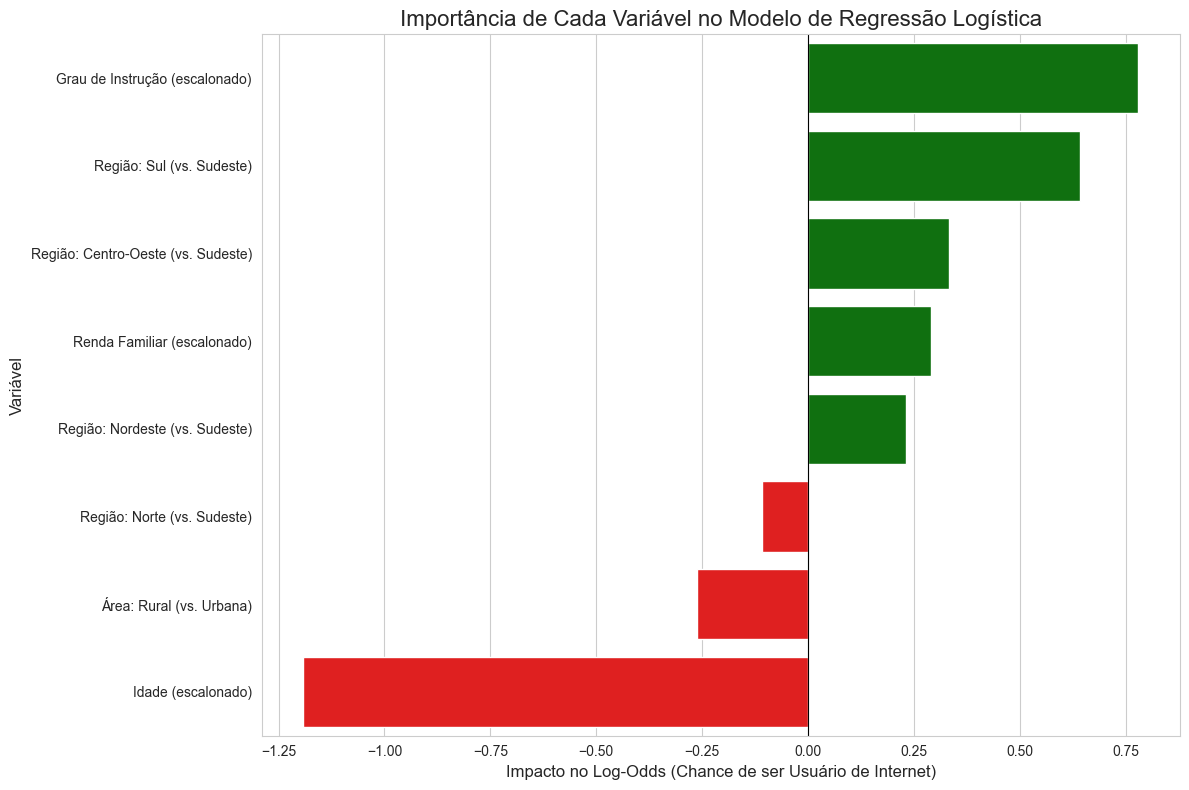

In [17]:
df_limpo = df[~df['RENDA_FAMILIAR'].isin([97, 98])].copy()
df_limpo = df_limpo[~df_limpo['GRAU_INSTRUCAO_1'].isin([97, 98])].copy()
df_limpo = df_limpo[df_limpo['C1'].isin([0, 1])].copy()
y = df_limpo['C1']
X = df_limpo.drop('C1', axis=1)
X_encoded = pd.get_dummies(X, columns=['AREA', 'COD_REGIAO_2'], drop_first=True)
colunas_numericas = ['RENDA_FAMILIAR', 'GRAU_INSTRUCAO_1', 'IDADE']
scaler = StandardScaler()
X_processed = X_encoded.copy()
X_processed[colunas_numericas] = scaler.fit_transform(X_encoded[colunas_numericas])

# --- Etapa 2: Treinar o modelo novamente ---
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)
modelo_logistico = LogisticRegression(random_state=42)
modelo_logistico.fit(X_train, y_train)

# --- Etapa 3: Extrair e Preparar os Coeficientes ---
coeficientes = modelo_logistico.coef_[0]
nomes_das_variaveis = X_processed.columns
df_coeficientes = pd.DataFrame({
    'Variável': nomes_das_variaveis,
    'Coeficiente (Log-Odds)': coeficientes
})

# Mapear para nomes legíveis
mapa_nomes = {
    'IDADE': 'Idade (escalonado)',
    'GRAU_INSTRUCAO_1': 'Grau de Instrução (escalonado)',
    'RENDA_FAMILIAR': 'Renda Familiar (escalonado)',
    'AREA_2': 'Área: Rural (vs. Urbana)',
    'COD_REGIAO_2_2': 'Região: Nordeste (vs. Sudeste)',
    'COD_REGIAO_2_3': 'Região: Sul (vs. Sudeste)',
    'COD_REGIAO_2_4': 'Região: Norte (vs. Sudeste)',
    'COD_REGIAO_2_5': 'Região: Centro-Oeste (vs. Sudeste)'
}
df_coeficientes['Variável'] = df_coeficientes['Variável'].replace(mapa_nomes)

# Ordenar por valor para o gráfico ficar mais claro
df_coeficientes = df_coeficientes.sort_values(by='Coeficiente (Log-Odds)', ascending=False)

# --- Etapa 4: Gerar o Gráfico de Importância das Variáveis ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Criar uma paleta de cores para positivo/negativo
palette = ['g' if c > 0 else 'r' for c in df_coeficientes['Coeficiente (Log-Odds)']]

# Criar o gráfico de barras horizontal
ax = sns.barplot(
    x='Coeficiente (Log-Odds)',
    y='Variável',
    data=df_coeficientes,
    palette=palette
)

ax.set_title('Importância de Cada Variável no Modelo de Regressão Logística', fontsize=16)
ax.set_xlabel('Impacto no Log-Odds (Chance de ser Usuário de Internet)', fontsize=12)
ax.set_ylabel('Variável', fontsize=12)

# Adicionar uma linha vertical em x=0 para referência
ax.axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('Imagens/importancia_variaveis.png')

print("Gráfico de importância das variáveis salvo como 'importancia_variaveis.png'")
print("\n--- Tabela de Coeficientes ---")
print(df_coeficientes.to_string(index=False))

### Relatório de coeficiente

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# --- Etapa 1: Preparação dos Dados ---

colunas_relevantes = [
    'C1', 'RENDA_FAMILIAR', 'GRAU_INSTRUCAO_1', 'IDADE', 'AREA', 'COD_REGIAO_2'
]
df = pd.read_csv('dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv', sep=';', usecols=colunas_relevantes)

# Limpeza completa dos dados
df_limpo = df[df['C1'].isin([0, 1])].copy()
df_limpo = df_limpo[~df_limpo['RENDA_FAMILIAR'].isin([97, 98])].copy()
df_limpo = df_limpo[~df_limpo['GRAU_INSTRUCAO_1'].isin([97, 98])].copy()

# Definir a variável alvo (y) e as features (X)
y = df_limpo['C1']
X = df_limpo.drop('C1', axis=1)

# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['AREA', 'COD_REGIAO_2'], drop_first=True, dtype=float)

# Escalonamento
colunas_numericas = ['RENDA_FAMILIAR', 'GRAU_INSTRUCAO_1', 'IDADE']
scaler = StandardScaler()
X_processed = X_encoded.copy()
X_processed[colunas_numericas] = scaler.fit_transform(X_encoded[colunas_numericas])


# --- Etapa 2: Modelagem com Statsmodels (com a correção) ---

# Adicionar a constante (intercepto) ao modelo
X_sm = sm.add_constant(X_processed)
y = y.astype(float)
X_sm = X_sm.astype(float)


# Criar e treinar o modelo Logit (Regressão Logística)
logit_model = sm.Logit(y, X_sm)
results = logit_model.fit()

# Imprimir o resumo estatístico completo
print("--- Resumo do Modelo de Regressão Logística (statsmodels) ---")
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.320398
         Iterations 7
--- Resumo do Modelo de Regressão Logística (statsmodels) ---
                           Logit Regression Results                           
Dep. Variable:                     C1   No. Observations:                19700
Model:                          Logit   Df Residuals:                    19691
Method:                           MLE   Df Model:                            8
Date:                Tue, 23 Sep 2025   Pseudo R-squ.:                  0.3392
Time:                        13:49:24   Log-Likelihood:                -6311.8
converged:                       True   LL-Null:                       -9552.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0646      0

A análise de regressão logística nos permitiu quantificar o impacto de cada fator na probabilidade de um indivíduo ser usuário de internet.

Primeiramente, o p-valor geral do modelo foi próximo de zero, indicando que o conjunto de variáveis escolhidas é estatisticamente significativo para prever o resultado.

Ao analisar as variáveis individualmente, observamos que todas apresentaram um p-valor (P>|z|) de 0.000, o que significa que todas elas têm uma influência estatisticamente significativa na inclusão digital. A interpretação dos coeficientes mais importantes é a seguinte:

Idade (IDADE): Apresentou o coeficiente negativo mais forte (aprox. -1.16). Isso confirma que, mantendo todos os outros fatores constantes, o aumento da idade é o fator que mais diminui a probabilidade de uma pessoa usar a internet.

Grau de Instrução (GRAU_INSTRUCAO_1): Foi a variável com o maior impacto positivo (coeficiente aprox. 0.76). Isso demonstra que a escolaridade é o fator mais importante para aumentar a probabilidade de inclusão digital.

Renda Familiar (RENDA_FAMILIAR): Também mostrou um impacto positivo e significativo (coeficiente aprox. 0.25), validando que maior renda está associada a uma maior chance de uso da internet.

Área Rural (AREA_2): O coeficiente negativo (aprox. -0.27) indica que morar na área rural, em comparação com a urbana, diminui significativamente a probabilidade de uma pessoa ser usuária de internet, mesmo controlando por outros fatores como renda e idade."

Além disso, as regiões do país também demonstram um coef significativo, tanto para as chances de usar a internet quanto para não usar